In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
import os
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from skimage import io
from matplotlib import pyplot as plt


In [5]:
annType = ['segm','bbox','keypoints']
annType = annType[2]      #specify type here
prefix = 'person_keypoints' if annType=='keypoints' else 'instances'
print ('Running demo for *%s* results.'%(annType))

Running demo for *keypoints* results.


In [18]:
#initialize COCO ground truth api
dataDir='../../../model/data'
dataType='val2017'
annFile = '%s/annotations/%s_%s.json'%(dataDir,prefix,dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


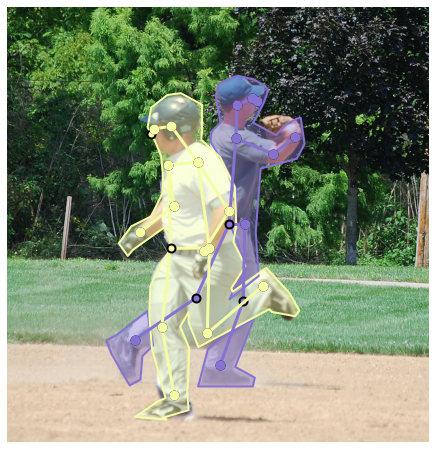

In [22]:
catIds = coco.getCatIds(catNms=['person']) # catIds=1 means people
imgIds = 872
img = coco.loadImgs(imgIds)[0]
image_path = os.path.join(dataDir, 'val2017/val2017', str(imgIds).zfill(12) + '.jpg')
I = io.imread(image_path)
plt.axis('off')
plt.imshow(I) #Draw the image and show it to plt.show()
bg = np.zeros((img['height'], img['width'], 3))
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
plt.show() #Display image